In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [114]:
df = pd.read_csv("train.csv")

In [115]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [117]:
df["PoolQC"] = df["PoolQC"].fillna(0)
df["ExterQual"] = df["ExterQual"].fillna(0)
df["ExterCond"] = df["ExterCond"].fillna(0)
df["BsmtQual"] = df["BsmtQual"].fillna(0)
df["BsmtCond"] = df["BsmtCond"].fillna(0)
df["HeatingQC"] = df["HeatingQC"].fillna(0)
df["KitchenQual"] = df["KitchenQual"].fillna(0)
df["FireplaceQu"] = df["FireplaceQu"].fillna(0)
df["GarageQual"] = df["GarageQual"].fillna(0)
df["GarageCond"] = df["GarageCond"].fillna(0)

In [118]:
df = df.replace("Ex", 5)
df = df.replace("Gd", 4)
df = df.replace("TA", 3)
df = df.replace("Fa", 2)
df = df.replace("Po", 1)

In [119]:
df.dtypes.value_counts()

int64      45
object     33
float64     3
dtype: int64

In [120]:
df["CentralAir"] = df["CentralAir"].replace("Y", 1)
df["CentralAir"] = df["CentralAir"].replace("N", 0)
#df["CentralAir"].value_counts() #YES or No variable

In [121]:
df["BsmtExposure"] = df["BsmtExposure"].fillna(0)
df["BsmtExposure"] = df["BsmtExposure"].replace(4, 3)
df["BsmtExposure"] = df["BsmtExposure"].replace("Av", 2)
df["BsmtExposure"] = df["BsmtExposure"].replace("No", 0)
df["BsmtExposure"] = df["BsmtExposure"].replace("Mn", 1)
#df["BsmtExposure"].value_counts()

In [122]:
df["PavedDrive"] = df["PavedDrive"].replace("Y", 2)
df["PavedDrive"] = df["PavedDrive"].replace("N", 0)
df["PavedDrive"] = df["PavedDrive"].replace("P", 1)
#df["PavedDrive"].value_counts()

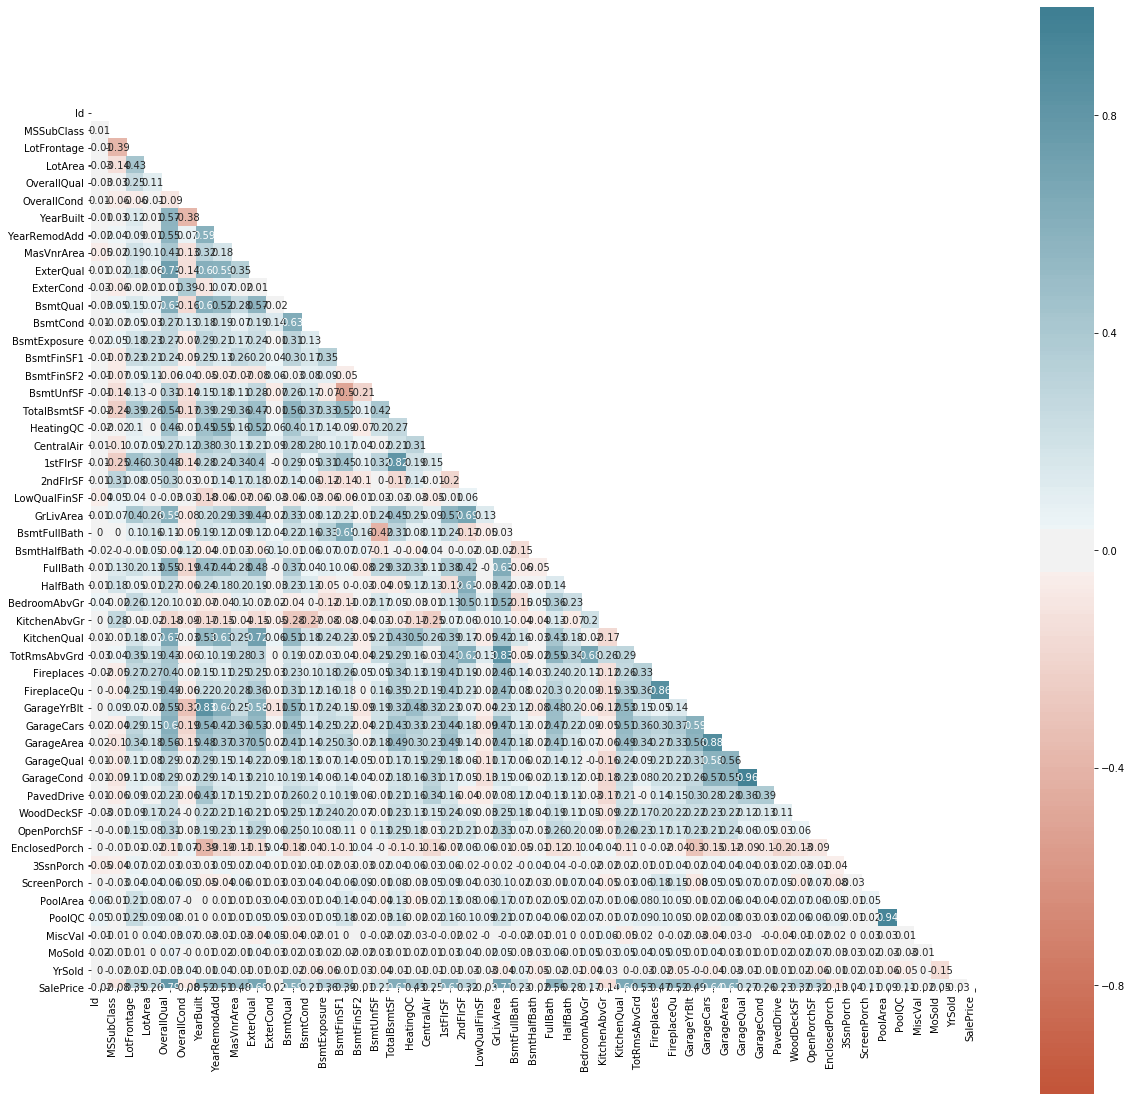

In [123]:
plt.figure(figsize=(20,20))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True


ax = sns.heatmap(
    round(df.corr(), 2), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [124]:
df.drop("Id", axis=1, inplace = True) #first of all we drop because it was assigned randomly and brings no value
df.drop("GarageCars", axis=1, inplace = True) # we drop GarageCars because it is logical that number of cars depends on the garage area
df.drop("PoolQC", axis=1, inplace = True)
df.drop("MiscFeature", axis = 1, inplace = True)
df.drop("BedroomAbvGr", axis = 1, inplace = True)
df.drop("1stFlrSF", axis = 1, inplace = True)
df.drop("2ndFlrSF", axis = 1, inplace = True)
df.drop("GarageCond", axis = 1, inplace = True)
df.drop("LowQualFinSF", axis = 1, inplace = True)
df.drop("KitchenAbvGr", axis = 1, inplace = True) #included in TotalRoomsAboveGround
df.drop("Utilities", axis = 1, inplace = True)
df.drop('Street', axis = 1, inplace = True)

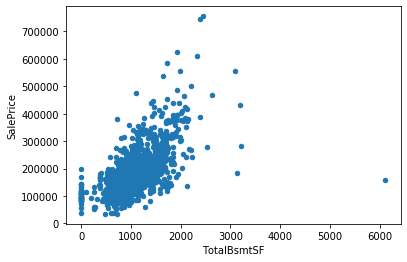

In [125]:
df.plot.scatter(x="TotalBsmtSF", y='SalePrice') #Total square feet of basement area

In [126]:
df = df[df['TotalBsmtSF'] < 4000]

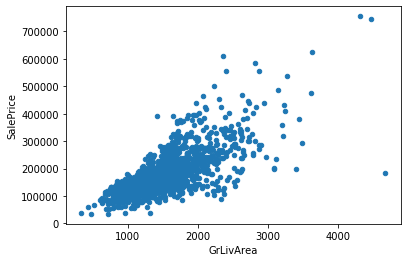

In [127]:
df.plot.scatter(x="GrLivArea", y='SalePrice')

In [128]:
df = df[df['GrLivArea'] < 4000]

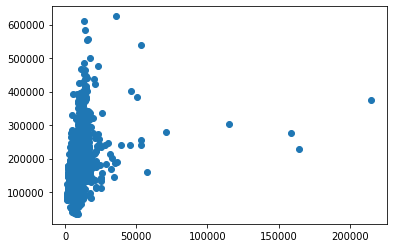

In [129]:
plt.scatter(x=df['LotArea'], y=df['SalePrice'])

In [130]:
df = df[df['LotArea'] < 80000]

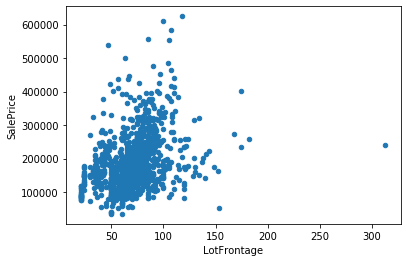

In [131]:
df.plot.scatter(x='LotFrontage', y='SalePrice')

In [132]:
df = df[df['LotFrontage'] < 200]

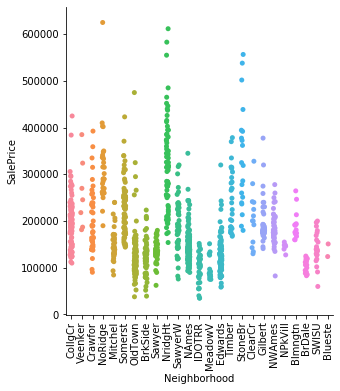

In [133]:
#plt.figure(figsize=(20,20))
aх = sns.catplot(x="Neighborhood", y="SalePrice", hue="Neighborhood", data=df )
aх.set_xticklabels(rotation=90)

In [134]:
homedata_onehot = pd.get_dummies(df, columns=['Foundation', 'GarageFinish', 'LandSlope', 'LotConfig',
 'LandContour', 'GarageType', 'LotShape', 'Alley', 'Fence', 'MSZoning', 'SaleType', 
    'Condition1', 'Functional', 'BsmtFinType1', 'BsmtFinType2',
 'MasVnrType', 'Exterior2nd', 'Heating', 'Neighborhood', 'SaleCondition',
 'Electrical', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType',
 'Condition2'])

In [135]:
homedata_onehot.dtypes.value_counts()

uint8      184
int64       39
float64      3
dtype: int64

In [136]:
homedata_onehot.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,0,0,1,0,0,0


In [137]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)

In [138]:
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
28,GarageYrBlt,0.061925
7,MasVnrArea,0.005021
0,MSSubClass,0.000000
155,Neighborhood_MeadowV,0.000000
144,Heating_Wall,0.000000
...,...,...
80,MSZoning_FV,0.000000
81,MSZoning_RH,0.000000
82,MSZoning_RL,0.000000
83,MSZoning_RM,0.000000


In [139]:
#homedata_onehot['LotFrontage'].value_counts()
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

0


69.42259414225941

In [140]:
homedata_onehot['LotFrontage'] = homedata_onehot['LotFrontage'].fillna(70.04995836802665)
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

0


69.42259414225941

In [141]:
#homedata_onehot['GarageYrBlt'].value_counts()
print(sum(homedata_onehot['GarageYrBlt'].isna()))
#homedata_onehot['GarageYrBlt'].mean()

74


In [142]:
same_count=0
diff_count=0
total_diff = 0
for i, x in zip(homedata_onehot['YearBuilt'],homedata_onehot['GarageYrBlt']):
    if np.isnan(x):
        continue
    else:
        if i == x:
            same_count+=1
        else:
            diff_count+=1
            total_diff= total_diff+(x-i)
        
print('same count:', same_count)
print('diff_count:', diff_count)
print('avg diff:', total_diff/diff_count)
print(same_count/(same_count+diff_count))
print(1-(same_count/(same_count+diff_count)))
print(81*0.79)
print(81*0.21)


same count: 870
diff_count: 251
avg diff: 27.40239043824701
0.776092774308653
0.22390722569134702
63.99
17.009999999999998


In [143]:
homedata_onehot['GarageYrBlt'] = homedata_onehot['YearBuilt']

In [144]:
print(sum(homedata_onehot['MasVnrArea'].isna()))
homedata_onehot['MasVnrArea'] = homedata_onehot['MasVnrArea'].fillna(0)

6


In [145]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
0,MSSubClass,0.0
169,Neighborhood_Veenker,0.0
143,Heating_OthW,0.0
144,Heating_Wall,0.0
145,Neighborhood_Blmngtn,0.0
...,...,...
79,MSZoning_C (all),0.0
80,MSZoning_FV,0.0
81,MSZoning_RH,0.0
82,MSZoning_RL,0.0


In [146]:
homedata_onehot.to_csv("train_cleaned.csv", index=False)

In [147]:
#print(homedata_onehot['LotArea'][762])
#homedata_onehot['LotArea'].describe()

In [148]:
#homedata_onehot['SalePrice'].head()
#homedata_onehot['LotArea'] = np.log(homedata_onehot['LotArea'])
#print(sum(homedata_onehot['LotArea'].isna()))

In [149]:
#homedata_onehot['LotArea'].describe()

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(homedata_onehot.drop(['SalePrice'], axis=1), homedata_onehot['SalePrice'], train_size=0.8, random_state=0)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))


956
956
239
239


In [151]:
y_train = np.log(y_train)

In [152]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

linear = linear_model.LinearRegression().fit(X_train, y_train)
ridge = linear_model.Ridge(alpha=50).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

linear_pred = linear.predict(X_val)
ridge_pred = ridge.predict(X_val)
lasso_pred = lasso.predict(X_val)

linear_pred = np.exp(linear_pred)
ridge_pred = np.exp(ridge_pred)
lasso_pred = np.exp(lasso_pred)


MAE_linear_pred = mean_absolute_error(y_val, linear_pred)
print('MAE linear pred:',MAE_linear_pred)

MAE_ridge_pred = mean_absolute_error(y_val, ridge_pred)
print('MAE ridge pred:',MAE_ridge_pred)

MAE_lasso_pred = mean_absolute_error(y_val, lasso_pred)
print('MAE lasso pred:',MAE_lasso_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, ridge_pred )))
## before feature selection around 23000

MAE linear pred: 15515.759031762052
MAE ridge pred: 14791.883523099883
MAE lasso pred: 20416.110803391526
RMSLE 0.12029658967566095


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#rf = RandomForestClassifier(n_estimators=250, max_depth=20, random_state=0).fit(X_train, y_train)

#y_pred = rf.predict(X_val)

#y_pred = np.exp(y_pred)

#MSE_RF_pred = mean_squared_error(y_val, y_pred)
#MAE_RF_pred = mean_absolute_error(y_val, y_pred)
#print('RMSE RF pred:', MSE_RF_pred**(1/2.0))
#print('MAE RF pred:', MAE_RF_pred)


In [32]:
from sklearn.svm import SVC

#svm_1 = SVC(kernel='poly', degree=1, gamma='auto', random_state=0).fit(X_train, y_train)

#svm1_pred = svm_1.predict(X_val)

#svm1_pred= np.exp(sv1_pred)

#MSE_svm1_pred = mean_squared_error(y_val, svm1_pred)
#MAE_svm1_pred = mean_absolute_error(y_val, svm1_pred)
#print('RMSE RF pred:', MSE_svm1_pred**(1/2.0))
#print('MAE RF pred:', MAE_svm1_pred)

In [ ]:
import xgboost as xgb

xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,learning_rate = 0.01,
                max_depth = 6,  alpha=1.0, n_estimators = 2000)


xgb1.fit(X_train, y_train)
xgb_pred = xgb1.predict(X_val)

xgb_pred= np.exp(xgb_pred)

MAE_xgb_pred = mean_absolute_error(y_val, xgb_pred)
print('MAE xgb pred:', MAE_xgb_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, xgb_pred )))

print(xgb1.feature_importances_)
# RMSLE 0.10676083602732896

C:\Users\mrsta\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [34]:
xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,gamma=0, learning_rate = 0.1,
                max_depth = 8, reg_alpha = 0, reg_lambda=1, n_estimators = 500)


xgb1.fit(X_train, y_train)
xgb_pred = xgb1.predict(X_val)

xgb_pred= np.exp(xgb_pred)

MAE_xgb_pred = mean_absolute_error(y_val, xgb_pred)
print('MAE xgb pred:', MAE_xgb_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, xgb_pred )))


C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE xgb pred: 15149.152049443494
RMSLE 0.1095093169352454


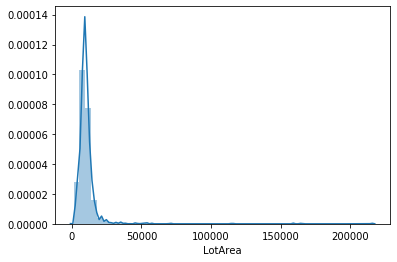

In [35]:
import seaborn as sns

sns.distplot(homedata_onehot['LotArea'])

        

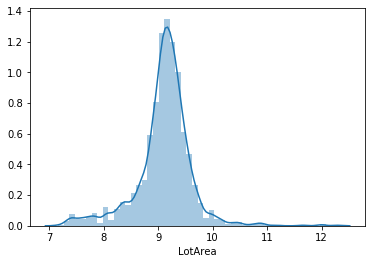

In [36]:
sns.distplot(np.log(homedata_onehot['LotArea']))